<a href="https://colab.research.google.com/github/Samuelcarbajal/EDP/blob/main/Ejercicio_2_Carbajal_Mares_Samuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La solucion de la ecuacion:

$\dfrac{\partial u}{\partial t}=\dfrac{\partial^{2} u}{\partial x^{2}}$ 

$\dfrac{\partial u(0,t)}{\partial x}=0, \dfrac{\partial u(1,t)}{\partial x}=0, t>0 $



sujeta a las condiciones de frontera:

$u(x,0)=f(x), 0<x<1$

y la condicion inicial:

$f(x)=\left\{\begin{array}{lcc}
-2, & si & 0 < x \leq \frac{1}
{2}\\
0, & si & \frac{1}
{2} < x < 1 \\
\end{array}
\right. $ 

Esta dada en terminos de laserie de Fourier por la expresion:

$u(x,t)=-1-\sum_{n=1}^{\infty} [\dfrac{4}{n\pi}sin(\dfrac{n\pi}{2})]cos(n\pi x)e^{-(n\pi)^{2}t}$


In [99]:
from pylab import *
import numpy as np

Para empezar, graficamos la condición inicial

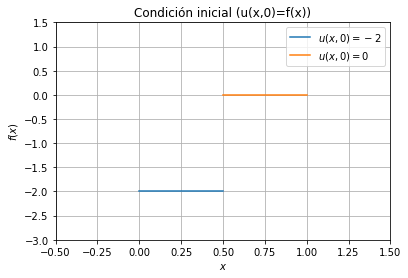

In [103]:
x1 = np.linspace(0, 1/2)
x2 = np.linspace(1/2, 1)

y1 = [-2 for x in x1]
y2 = [0 for x in x2]

plot(x1,y1,label='$u(x,0)=-2$')
plot(x2,y2,label='$u(x,0)=0$')

plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-0.5,1.5]),ylim([-3,1.5]),grid(),legend()
show()

Usamos una serie de Fourier para aproximar la condición inicial $f(x)=\left\{\begin{array}{lcc}
-2, & si & 0 < x \leq \frac{1}
{2}\\
0, & si & \frac{1}
{2} < x < 1 \\
\end{array}
\right. $ 

In [91]:

def funcion_u(x,N=15): 
    f = zeros(len(x))
    for m in range(1,N):
        f += 4*cos(m*pi*x)*sin(m*pi/2)/(m*pi)
    return -1-f

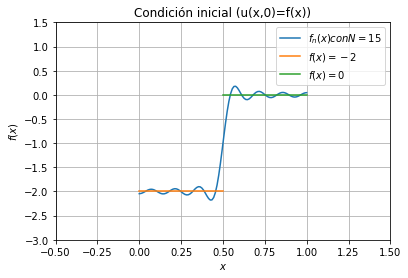

In [106]:
f_n = funcion_u(x)
plot(x,f_n,label='$f_n(x) con N=15$')
plot(x1,y1,label='$f(x)=-2$')
plot(x2,y2,label='$f(x)=0$')

plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-0.5,1.5]),ylim([-3,1.5]),grid(),legend()
show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos


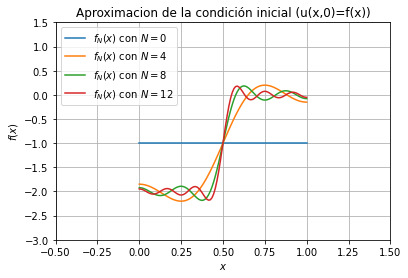

In [102]:
for i in range(0,16,4):
  plot(x,funcion_u(x,i),label='$f_N(x)$ con $N=%d$' %i)

plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximacion de la condición inicial (u(x,0)=f(x))")
xlim([-0.5,1.5]),ylim([-3,1.5]),grid(),legend()
show() 


Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial t=0

In [108]:
def u_x_t(x,t,N=40):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for m in range(1,N):
            f[:,i] += 4*cos(m*pi*x)*sin(m*pi/2)/(m*pi)*exp(-m**2*pi**2*t[i])
    return -1-f

In [109]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

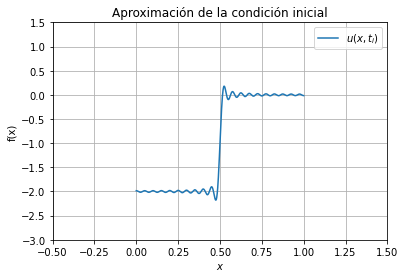

In [110]:
plot(x,U[:,0],label='$u(x,t_i)$')
plt.xlabel('$x$'); plt.ylabel('f(x)'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.5,1.5]),ylim([-3,1.5]),grid(),legend()
show() 

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t\rightarrow \infty$

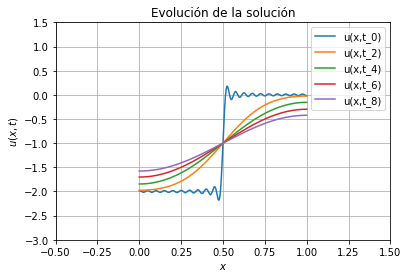

In [89]:
for i in range(0,10,2):
    plot(x,U[:,i],label='$u(x,t_%d)$' %i)
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.5,1.5]),ylim([-3,1.5]),grid(),legend()
show() 


Y podemos ver esto en una gráfica en 3D

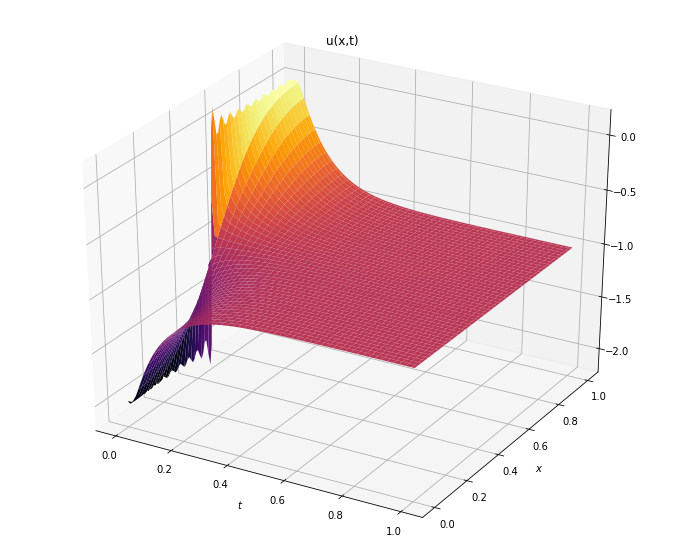

In [90]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="inferno"); 